In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/HousePricePrediction (2).csv')

In [8]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [9]:
# Step 1: Load and Explore the Dataset
print("Loading dataset...")
df=pd.read_csv('/content/drive/MyDrive/HousePricePrediction (2).csv')

# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(df.head())



Loading dataset...
First few rows of the dataset:
   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [10]:
# Getting the basic information and check for missing values
print("\nDataset Info:")
print(df.info())

# Summary statistics to understand data distribution
print("\nSummary Statistics:")
print(df.describe())




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB
None

Summary Statistics:
                Id   MSSubClass        LotArea  OverallCond    YearBuilt  \
count  2919.000000  2919.000000    2919.000000  2919.000000  2919.0

In [11]:
# Step 2: Data Preprocessing
print("\nHandling missing values...")
# Fill missing values with median for numerical columns
df.fillna(df.median(numeric_only=True), inplace=True)

# Encoding categorical variables using one-hot encoding
print("\nEncoding categorical variables...")
df = pd.get_dummies(df, drop_first=True)

# Checking the data after preprocessing
print("\nData after preprocessing:")
print(df.head())



Handling missing values...

Encoding categorical variables...

Data after preprocessing:
   Id  MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0   0          60     8450            5       2003          2003         0.0   
1   1          20     9600            8       1976          1976         0.0   
2   2          60    11250            5       2001          2002         0.0   
3   3          70     9550            5       1915          1970         0.0   
4   4          60    14260            5       2000          2000         0.0   

   TotalBsmtSF  SalePrice  MSZoning_FV  ...  Exterior1st_CemntBd  \
0        856.0   208500.0        False  ...                False   
1       1262.0   181500.0        False  ...                False   
2        920.0   223500.0        False  ...                False   
3        756.0   140000.0        False  ...                False   
4       1145.0   250000.0        False  ...                False   

   Exterior1st_HdBoa

In [12]:
# Split the data into features and target variable
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Split into training and testing sets
print("\nSplitting the data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




Splitting the data...


In [13]:
# Standardize the features
print("\nStandardizing features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Model Building with scikit-learn
print("\nTraining RandomForestRegressor model...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)



Standardizing features...

Training RandomForestRegressor model...


RandomForestRegressor(random_state=42)

In [14]:
# Step 4: Evaluate the Random Forest Model
print("\nEvaluating RandomForestRegressor model...")
rf_y_pred = rf_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_y_pred)
print(f"RandomForestRegressor Mean Squared Error: {rf_mse:.2f}")

# Step 5: Building and Training Neural Network Model with TensorFlow
print("\nBuilding and training Neural Network model...")
nn_model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

nn_model.compile(optimizer='adam', loss='mean_squared_error')




Evaluating RandomForestRegressor model...
RandomForestRegressor Mean Squared Error: 797554736.93

Building and training Neural Network model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Training the neural network
history = nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Step 6: Evaluate the Neural Network Model
print("\nEvaluating Neural Network model...")
nn_y_pred = nn_model.predict(X_test_scaled)
nn_mse = mean_squared_error(y_test, nn_y_pred)
print(f"Neural Network Mean Squared Error: {nn_mse:.2f}")

# Step 7: Visualizations
print("\nCreating visualizations...")

# Feature Importance from Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]



Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 31375026176.0000 - val_loss: 32292485120.0000
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32815898624.0000 - val_loss: 32283052032.0000
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31889115136.0000 - val_loss: 32256923648.0000
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32676358144.0000 - val_loss: 32201644032.0000
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33477097472.0000 - val_loss: 32106209280.0000
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31809216512.0000 - val_loss: 31958345728.0000
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32118452224.0000 - val_loss: 31749707776.0000
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31399735296.0000 - val_loss: 31468015616.0000
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 32379602944.0000 - val_loss: 31109195776.0000
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32300

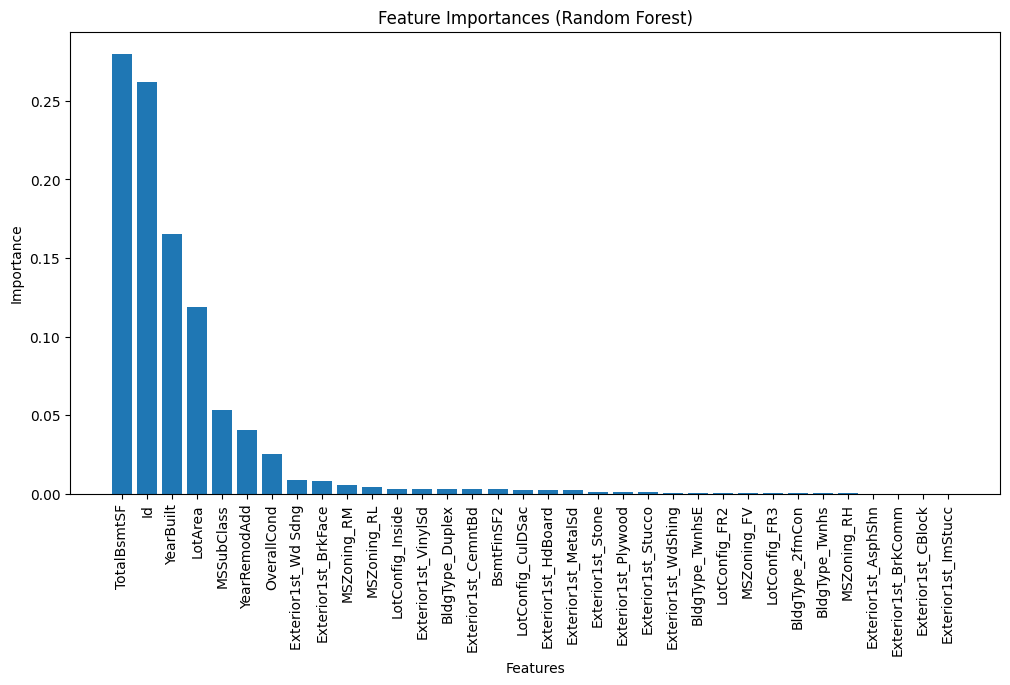

In [16]:
plt.figure(figsize=(12, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


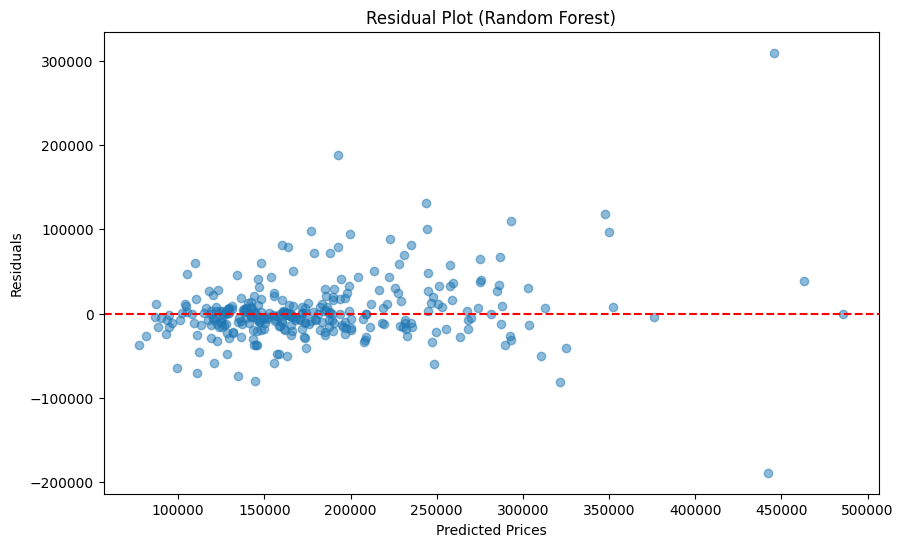

In [17]:
# Residual Plot for Random Forest
residuals = y_test - rf_y_pred
plt.figure(figsize=(10, 6))
plt.scatter(rf_y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Random Forest)')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()



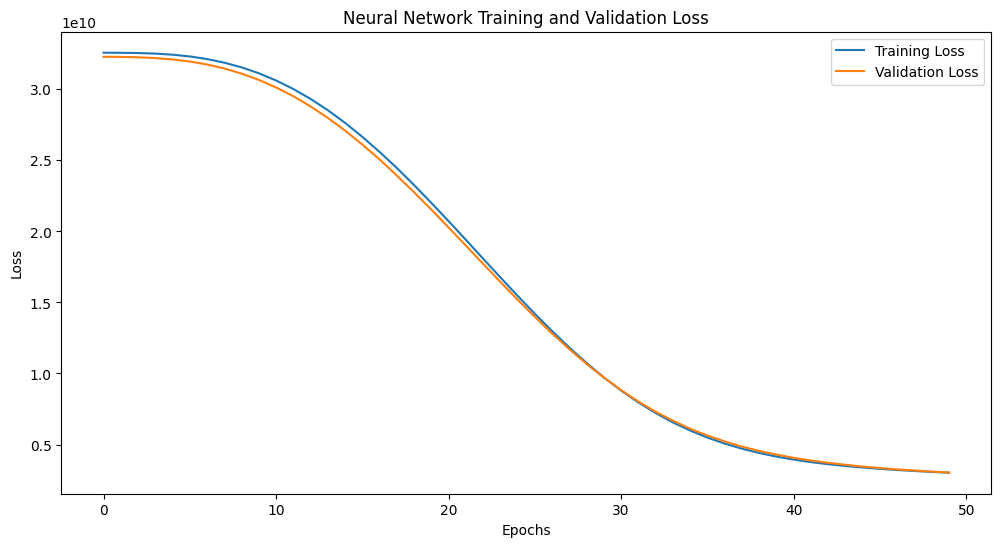


Analysis complete!


In [18]:
# Loss Curve for Neural Network
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\nAnalysis complete!")

